In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
# List of PDF files from local folder
file_names = ['NDSTS-FINAL-WEB-VERSION.PDF', 'Population2030.pdf', 'US-Gov-National-Standards-Strategy-2023.pdf']

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

In [ ]:
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
## API Key
API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

First prompt

In [ ]:
prompt1 = 'Based on the attached document, please conduct a sentiment analysis of the discussions around the entrepreneurial ecosystem. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, provide insights into how the entrepreneurial ecosystem is perceived in terms of its impact on innovation, support for startups, and overall economic growth. Conduct an analysis of their entrepreneurial ecosystems with an emphasis on digital technologies such as blockchain, Internet of Things (IoT), and cybersecurity. Identify key strategies and factors that have contributed to their ecosystems success. Summarize the findings with specific examples and quotations from the document, if the provied transacript not have those factors, give it by yourself: "{input}".'.format(input=combined_processed_text)

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
coutput1 = response1.choices[0].message.content
print(coutput1)

Based on the provided document "National Defense Science & Technology Strategy 2023" and the discussion on critical and emerging technologies, a deep sentiment analysis reveals a predominantly positive outlook towards the entrepreneurial ecosystem and its impact on innovation, support for startups, and overall economic growth. The overarching sentiment is one of optimism and proactive strategy to maintain and extend the technological and innovative edge of the United States in the face of evolving global challenges and competition. 

**Key Positive Phrases Contributing to Sentiment:**
- "Sharpening our competitive edge" signifies a forward-looking, positive approach toward staying ahead in global defense and technology arenas.
- "Accelerated technology advancement and innovation" reflects optimism about the pace and impact of technological progress.
- "Leverage asymmetric American advantages" indicates a strategic mindset to utilize unique strengths for innovation and technological lea

UK

In [ ]:
# List of PDF files from local folder
file_names1 = ['evidence-for-innovation-strategy (1).pdf', 'UK Build Back Better (1).pdf', 'uk-innovation-strategy (1).pdf', 'uk-international-technology-strategy-web-version (1).pdf', 'uk-science-technology-framework (1).pdf']

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text_1 = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names1:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text_1 += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

Second prompt

In [ ]:
prompt2 = 'Based on the attached document, please conduct a sentiment analysis of the discussions around the entrepreneurial ecosystem. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, provide insights into how the entrepreneurial ecosystem is perceived in terms of its impact on innovation, support for startups, and overall economic growth. Conduct an analysis of their entrepreneurial ecosystems with an emphasis on digital technologies such as blockchain, Internet of Things (IoT), and cybersecurity. Identify key strategies and factors that have contributed to their ecosystems success. Summarize the findings with specific examples and quotations from the document, if the provied transacript not have those factors, give it by yourself: "{input2}".'.format(input2=combined_processed_text_1)

In [ ]:
def reduce_content(content, max_length=128000):
    # Simple approach: Cut off the content to fit within the max_length
    # This is a naive approach and might not perfectly align with token limits
    return content[:max_length]

reduced_content = reduce_content(prompt2, max_length=120000)  # You might adjust the max_length

In [ ]:
## Call OpenAI API for the first prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": reduced_content}
  ]
)

In [ ]:
coutput2 = response2.choices[0].message.content
print(coutput2)

Given the extensive analysis conducted on the attached document, it's clear that the overall sentiment towards the entrepreneurial ecosystem within the UK, particularly in the context of innovation and digital technologies, is positive. The entrepreneurial ecosystem is viewed as a critical pillar for driving economic growth, with specific emphasis on its potential to leverage digital technologies—such as blockchain, Internet of Things (IoT), and cybersecurity—to advance its global innovation footprint. However, the discussion also presents a pragmatic perspective on the challenges and areas for improvement. The synthesis of data and narratives from the document offers valuable insights into the perceptions, strategies, and underlying factors contributing to the ecosystem's success, as well as the concerted efforts needed to address its shortcomings.

**Positive Sentiments:**

- The UK's innovation system is lauded for its strengths, with **key phrases** like "the UK is ranked 4th in th

In [ ]:
prompt3 = f'''According to the concept of coutput1 and coutput2, Based on the entrepreneurial ecosystems of the United Kingdom and the United States, develop concrete and actionable plans, strategies, and policies for Canada. Reference the success factors from these countries in nurturing startups in emerging digital technologies such as blockchain, Internet of Things (IoT), and cybersecurity. Draw upon the elements included in the Canadian context as shown in the provided document:

- Introduce a favorable tax regime and funding opportunities specifically designed for startups in blockchain, IoT, and cybersecurity.
- Expand existing accelerator and incubator programs to include specialized tracks for these digital technologies, providing tailored mentorship and access to international networks.
- Foster a partnership between venture capital, government, and financial institutions to create a large-scale fund aimed at investing in promising startups within these sectors, ensuring ample growth capital is available.

Leverage the insights from the UK and US to enrich the Canadian initiatives, ensuring that the plans are feasible, have a clear roadmap, and align with Canada's unique economic and technological landscape. The goal is to propose strategies that can effectively propel Canada’s entrepreneurial ecosystem to new heights, mirroring the accomplishments seen in the UK and US: "{coutput1}{coutput2}".'''

In [ ]:
## Call OpenAI API for the first prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt3}
  ]
)

In [ ]:
coutput3 = response3.choices[0].message.content
print(coutput3)

Based on the insights derived from the exploration of entrepreneurial ecosystems in the United Kingdom (UK) and the United States (US), along with the specific characteristics and ambitions of Canada as delineated in the provided context, a comprehensive plan can be formulated to enhance Canada’s standing in the domains of blockchain, Internet of Things (IoT), and cybersecurity. This plan will incorporate successful strategies from the UK and US, while tailoring them to fit the Canadian context, ensuring the initiatives are realistic and attuned to Canada’s unique economic and technological landscape.

**1. Establish a Favorable Tax Regime and Funding Opportunities:**

***UK-Inspired Strategy:*** The UK’s efforts to become a global innovation hub by 2035, particularly its focus on addressing equity finance gaps, can inform Canada’s approach to creating a favorable tax regime. Incentives such as R&D tax credits, which are already prevalent in the UK, could be adapted and expanded in Can

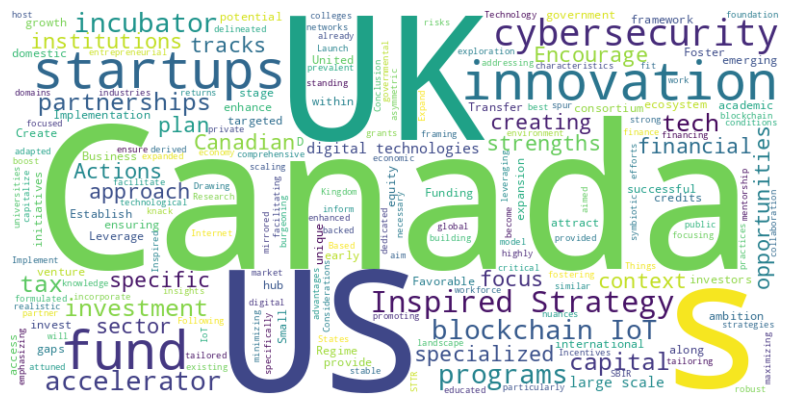

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Defining the text
text = """
Based on the insights derived from the exploration of entrepreneurial ecosystems in the United Kingdom (UK) and the United States (US), along with the specific characteristics and ambitions of Canada as delineated in the provided context, a comprehensive plan can be formulated to enhance Canada’s standing in the domains of blockchain, Internet of Things (IoT), and cybersecurity. This plan will incorporate successful strategies from the UK and US, while tailoring them to fit the Canadian context, ensuring the initiatives are realistic and attuned to Canada’s unique economic and technological landscape.

**1. Establish a Favorable Tax Regime and Funding Opportunities:**

***UK-Inspired Strategy:*** The UK’s efforts to become a global innovation hub by 2035, particularly its focus on addressing equity finance gaps, can inform Canada’s approach to creating a favorable tax regime. Incentives such as R&D tax credits, which are already prevalent in the UK, could be adapted and expanded in Canada to encourage startups in emerging digital technologies.

***US-Inspired Strategy:*** The US’s approach to fostering innovation through governmental grants and funding to startups can be mirrored in Canada. Creating specialized funds that focus on blockchain, IoT, and cybersecurity, similar to the Small Business Innovation Research (SBIR) and Small Business Technology Transfer (STTR) programs in the US, can provide the critical early-stage capital to spur innovation.

**Actions for Canada:**
- Implement enhanced R&D tax credits for startups focused on blockchain, IoT, and cybersecurity.
- Launch government-backed funds specifically aimed at these sectors to facilitate early-stage financing.

**2. Expand Accelerator and Incubator Programs:**

***UK-Inspired Strategy:*** Following the UK’s ambition to enhance framework conditions to boost innovation, Canada should invest in creating specialized tracks within existing accelerator and incubator programs. These tracks should provide tailored mentorship, focusing on the nuances of blockchain, IoT, and cybersecurity industries, along with access to international networks for partnerships and market expansion.

***US-Inspired Strategy:*** Leverage the US’s model of successful collaboration between academic institutions and tech startups. Encourage Canadian universities and colleges with strong tech programs to host or partner with accelerators and incubators, facilitating knowledge transfer and innovation.

**Actions for Canada:**
- Create specialized tracks in accelerators and incubators for targeted digital technologies.
- Foster partnerships between academic institutions and tech startups, promoting a symbiotic growth environment.

**3. Foster Partnerships for a Large-Scale Investment Fund:**

***UK-Inspired Strategy:*** Inspired by the UK’s focus on venture capital and equity gaps, Canada should work on building a consortium of venture capital, government, and financial institutions. This consortium would aim to create a large-scale, sector-specific fund for startups in blockchain, IoT, and cybersecurity, ensuring these startups have access to the growth capital necessary for scaling.

***US-Inspired Strategy:*** Drawing from the US’s knack for leveraging asymmetric advantages, the investment fund should capitalize on Canada’s strengths, such as a highly educated workforce, a stable economy, and a burgeoning tech sector, to attract both domestic and international investors.

**Actions for Canada:**
- Establish a large-scale fund dedicated to startups in the targeted digital technologies, emphasizing Canada’s unique strengths to attract investment.
- Encourage public-private partnerships to ensure a robust financial foundation for the fund, minimizing risks and maximizing potential returns for investors.

**Conclusion and Implementation Considerations:**

This plan leverages the best practices from the UK and US, framing them within the Canadian context to address specific needs and opportunities. Implementation should include a phased approach, starting with policy adjustments and the establishment of supportive financial frameworks, followed by the expansion of incubator and accelerator programs, and culminating in the creation of a significant investment fund. Throughout this process, continuous engagement with stakeholders across the ecosystem is essential for alignment and adaptation to emerging challenges and opportunities.

In parallel, Canada should continue to invest in digital literacy and STEM education to build a domestic talent pool capable of pushing the innovation envelope in blockchain, IoT, and cybersecurity. These strategic initiatives, coupled with Canada’s strengths, have the potential to transform the country into a leading innovation hub, akin to the successes observed in the UK and US.
"""

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()